# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [2]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, optimize
from scipy import stats
from scipy.stats import norm

%matplotlib inline

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
df1 = data[['race','call']]
df1.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [7]:
df1.groupby(['race']).describe()

call
race                   
b    count  2435.000000
     mean      0.064476
     std       0.245649
     min       0.000000
     25%       0.000000
     50%       0.000000
     75%       0.000000
     max       1.000000
w    count  2435.000000
     mean      0.096509
     std       0.295346
     min       0.000000
     25%       0.000000
     50%       0.000000
     75%       0.000000
     max       1.000000

Question 1.  What test is appropriate for this problem? Does CLT apply?

An appropriate test is to test if the proportion of b getting a call is the same as proportion of w gettting a call. CLT applies since n is large enough.

In [ ]:
Question 2.  What are the null and alternate hypotheses?

In [ ]:
The null hypothesis is that the p(w)=p(b), p(w)-p(b)=0.
The alternate hypothesis is such that the p(w) != p(b), |p(w)-p(b)|  > 0.


In [13]:
call_mean = df1.groupby(['race']).mean() # establish the probability of each receiving a call back
call_mean

,call
race,
b,0.064476
w,0.096509


In [14]:
n = df1.groupby(['race']).count()
n

,call
race,
b,2435
w,2435


In [15]:

b_count = n.call[0]
w_count = n.call[1]

In [18]:
pb = call_mean.call[0]
pw = call_mean.call[1]
df1.groupby(['race']).std()

null = pw - pb  # The difference in proportion
null

0.032032855

In [20]:
pb_var =( pb * (1-pb))/ b_count # variance of the sampling distribution of pb
pw_var = (pw * (1-pw))/w_count  # variance of the sampling distribution of pw

In [26]:
var_wminusb = pb_var + pw_var  # variance of the pw-pb is the same as the addition of the two variance
var_wminusb

6.0580857679997383e-05

In [35]:
std_wminusb = (var_wminusb) ** 0.5 # standard deviation of the pw-pb
std_wminusb

0.0077833705860634299

In [32]:
crit_value = std_wminusb*1.96  # the distance from the mean of sampling distribution of pw-pb for 95% interval
crit_value

0.015255406348684322

In [34]:
max = null+crit_value
min = null-crit_value
print('The confidence interval of the mean of the difference is from %0.6F to %0.5F' %(min,max))

The confidence interval of the mean of the difference is from 0.016777 to 0.04729


# Question 3.  Compute margin of error, confidence interval, and p-value.
The margin of error is 0.015.  The 95% confidence interval for the difference of the two proportion is 0.016777 to 0.04729 with a p-value of 0.05.


# Question 5.  Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis showed that there's significant difference between the proportion of call backs of white name and black names.  The null hypotheis that there's no difference is rejected because the 95% CI of the difference does not include 0.



race
b    [[Axes(0.125,0.125;0.775x0.755)]]
w    [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

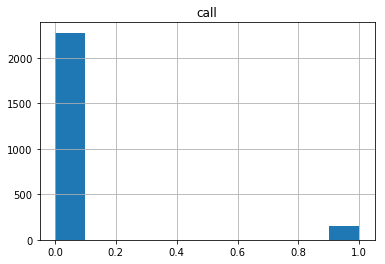

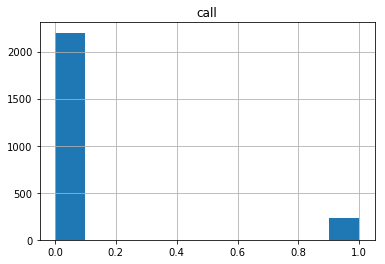

In [27]:
x=df1.groupby(['race']).hist('call',bins=10)
x